# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цель практической работы

Научиться работать с аномалиями в данных, строить визуализации, а также выявлять зависимости между переменными с помощью библиотеки Matplotlib.

## Что входит в практическую работу

1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графики для количественных переменных.
4. Построить графики для категориальных переменных.
5. Исследовать зависимости в данных. 

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [2]:
df = pd.read_csv('C:/Users/User/Desktop/Python/Python/ds-intro/ds-intro/19_data_visualization/homework/data/vehicles_dataset_upd.csv', sep = ',')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

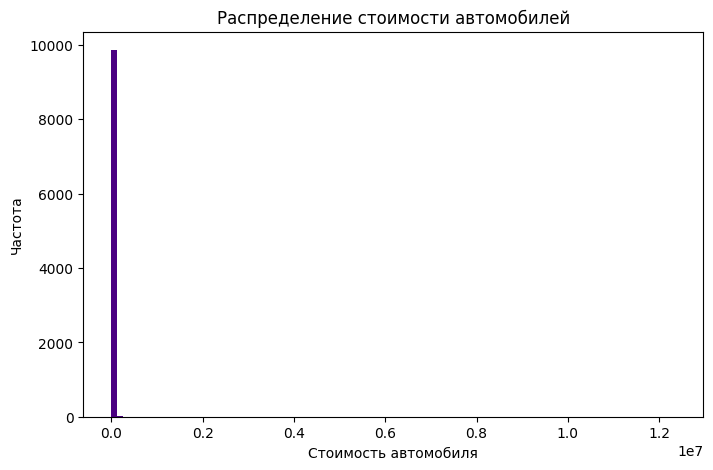

In [5]:
plt.figure(figsize=(8,5))
plt.hist(df.price, bins=100, color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобилей');

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

Text(0.5, 1.0, 'Ящик с усами: распределение стоимости автомобиля')

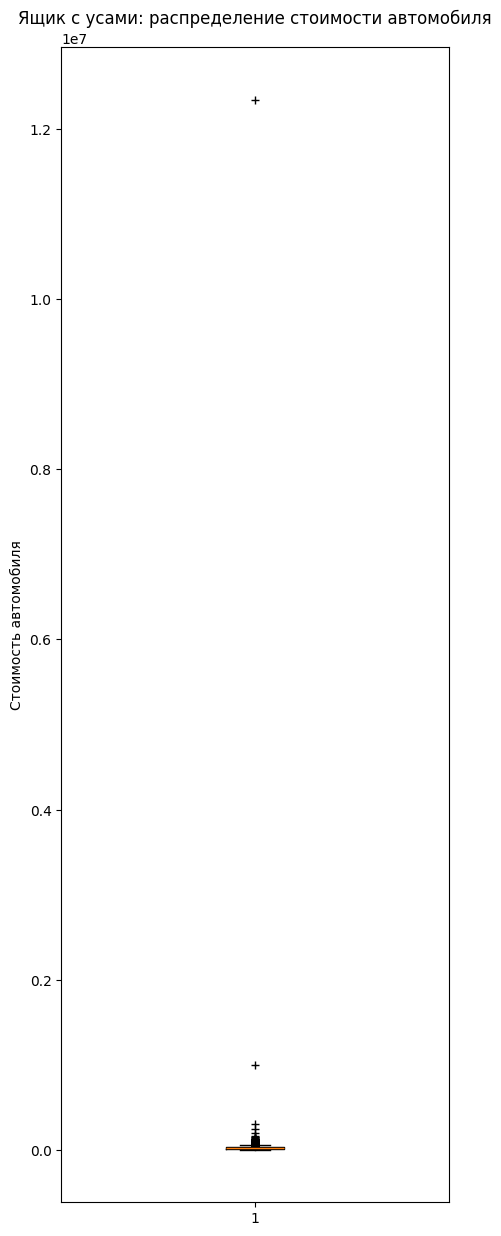

In [10]:
plt.figure(figsize=(5, 15))
plt.boxplot(df.price, sym='+')
plt.ylabel('Стоимость автомобиля')
plt.title('Ящик с усами: распределение стоимости автомобиля')

4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [13]:
stats_price = df.price.describe()
stats_price.apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [15]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Нижняя граница:", lower_bound)
print("Верхняя граница:", upper_bound)


min_val = df.price.min()
max_val = df.price.max()

print("Минимальное значение:", min_val, "->", lower_bound <= min_val <= upper_bound)
print("Максимальное значение:", max_val, "->", lower_bound <= max_val <= upper_bound)

Нижняя граница: -22485.0
Верхняя граница: 58275.0
Минимальное значение: 500 -> True
Максимальное значение: 12345678 -> False


получается нижняя граница -22485 можно считать как 0, то есть с минусом хотя в реальности нет таких цен которые идут отрицательным знаком, и в то же время мин.цена у нас 500, входит в диапазон, верхняя граница 58 275, у нас макс цена 27990, тоже входит в диапазон , если цены были бы выше чем (75-й перцентиль) то считалось бы как выбросом.  Выше max 12345678.000 то это аномалии или ошибки данных

6. Посчитайте и выведете количество выбросов в стоимости автомобиля. 

In [17]:
outliers_count = df[(df.price < lower_bound) | (df.price > upper_bound)].shape[0]

print(f"Количество выбросов в цене: {outliers_count}")

Количество выбросов в цене: 207


7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [18]:
outliers_df = df[df['price'] > upper_bound].sort_values(by='price', ascending=False)

outliers_df

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
6239,7302112231,https://akroncanton.craigslist.org/ctd/d/canto...,akron / canton,https://akroncanton.craigslist.org,12345678,2019,chevrolet,other,gas,100000,clean,automatic,https://images.craigslist.org/00F0F_g6k0zWbump...,"WE HAVE MOVED TO 2517 FULTON DRIVE NW CANTON, ...",oh,40.846500,-81.440800,2021-04-05T12:26:23-0400,high,2021-04-05 16:26:23+00:00
9663,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,283995,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00
5585,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,high,2021-04-28 19:49:25+00:00
290,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22T09:38:59-0700,high,2021-04-22 16:38:59+00:00
6035,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,high,2021-05-01 15:48:44+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,7313502600,https://harrisburg.craigslist.org/ctd/d/salem-...,harrisburg,https://harrisburg.craigslist.org,58670,2016,chevrolet,other,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,pa,44.927304,-123.030322,2021-04-27T15:56:06-0400,high,2021-04-27 19:56:06+00:00
8050,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15T08:58:48-0500,high,2021-04-15 13:58:48+00:00
934,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-24T20:46:06-0700,high,2021-04-25 03:46:06+00:00
5977,7310551940,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,58500,2019,chevrolet,"silverado 2500hd 4wd crew cab 153.7"" ltz",other,50930,clean,automatic,https://images.craigslist.org/01010_ldls5xr3zz...,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-21T17:05:31-0400,high,2021-04-21 21:05:31+00:00


8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [19]:
top_15_expensive = outliers_df.tail(15)
print(top_15_expensive)

              id                                                url  \
9329  7316955095  https://houston.craigslist.org/ctd/d/tampa-200...   
9683  7316583261  https://dallas.craigslist.org/dal/cto/d/rockwa...   
3267  7314034198  https://reno.craigslist.org/ctd/d/vallejo-2014...   
2786  7302350597  https://ventura.craigslist.org/cto/d/bakersfie...   
3762  7310500133  https://lakeland.craigslist.org/ctd/d/orlando-...   
96    7311450619  https://wenatchee.craigslist.org/ctd/d/kittita...   
682   7314082007  https://orangecounty.craigslist.org/ctd/d/amer...   
2685  7311144355  https://austin.craigslist.org/cto/d/los-angele...   
1253  7313450196  https://lasvegas.craigslist.org/ctd/d/salem-20...   
4265  7313452917  https://austin.craigslist.org/ctd/d/salem-2016...   
6628  7313502600  https://harrisburg.craigslist.org/ctd/d/salem-...   
8050  7307146509  https://lubbock.craigslist.org/ctd/d/brownfiel...   
934   7312212565  https://lasvegas.craigslist.org/cto/d/fresno-d...   
5977  

9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

*Подсказка*: обратите внимание на оператор "~" (тильда) при фильтрации исходного датафрейма. Это операция not, которая часто применяется для инвертирования логических значений. Советуем заглянуть в [документацию](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), чтобы получить представление о его работе на примерах использования.

In [20]:
df_new = df[~df.index.isin(outliers_df.index)]
print(df_new.head(5))

           id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7316474668  https://newyork.craigslist.org/lgi/cto/d/baldw...   

          region                           region_url  price  year  \
0    chattanooga   https://chattanooga.craigslist.org  54990  2020   
1   north jersey     https://newjersey.craigslist.org  16942  2016   
2   reno / tahoe          https://reno.craigslist.org  35590  2017   
3   fayetteville  https://fayetteville.craigslist.org  14500  2013   
4  new york city       https://newyork.craigslist.org  21800  2021   

  manufacturer                   model    fuel  odometer title_status  \
0          ram  2500 crew cab big horn  diesel     27442        clean   
1         ford    explor

### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [21]:
yearly_price_stats = df_new.groupby('year').agg({'price': 'mean'}).reset_index()
yearly_price_stats.rename(columns={'year': 'Year', 'price': 'Average_Price'}, inplace=True)
print(yearly_price_stats)

    Year  Average_Price
0   1995   13219.472554
1   1996    9362.960000
2   1997    6441.250000
3   1998    6528.672727
4   1999    7446.641975
5   2000    7614.410256
6   2001    7852.090164
7   2002    7173.798658
8   2003    7767.962162
9   2004    7684.105769
10  2005    8019.770428
11  2006    8733.512195
12  2007    8578.738462
13  2008    9508.803063
14  2009    9703.035336
15  2010   11251.862857
16  2011   13014.494670
17  2012   14906.807432
18  2013   16138.114370
19  2014   18984.084375
20  2015   22383.042618
21  2016   23163.207521
22  2017   26328.875959
23  2018   28406.824289
24  2019   31434.111111
25  2020   33791.940104
26  2021   23868.250000
27  2022   15249.000000


2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

Text(0, 0.5, 'Стоимость автомобиля')

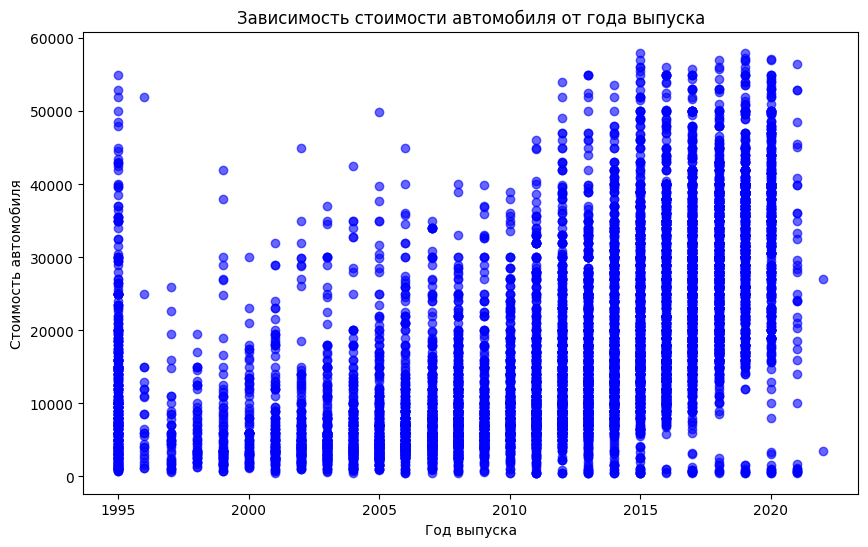

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df_new['year'], df_new['price'], alpha=0.6, color='blue')
plt.title('Зависимость стоимости автомобиля от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Стоимость автомобиля')


3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [24]:
cars_per_year = df_new.groupby('year').size().reset_index(name='Count')
print(cars_per_year)

    year  Count
0   1995    419
1   1996     25
2   1997     44
3   1998     55
4   1999     81
5   2000     78
6   2001    122
7   2002    149
8   2003    185
9   2004    208
10  2005    257
11  2006    287
12  2007    390
13  2008    457
14  2009    283
15  2010    350
16  2011    469
17  2012    592
18  2013    682
19  2014    640
20  2015    657
21  2016    718
22  2017    782
23  2018    774
24  2019    531
25  2020    384
26  2021     40
27  2022      2


4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [25]:
df_filtered = df_new[df_new['year'] <= 2021]
print(df_filtered.head(5))

           id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7316474668  https://newyork.craigslist.org/lgi/cto/d/baldw...   

          region                           region_url  price  year  \
0    chattanooga   https://chattanooga.craigslist.org  54990  2020   
1   north jersey     https://newjersey.craigslist.org  16942  2016   
2   reno / tahoe          https://reno.craigslist.org  35590  2017   
3   fayetteville  https://fayetteville.craigslist.org  14500  2013   
4  new york city       https://newyork.craigslist.org  21800  2021   

  manufacturer                   model    fuel  odometer title_status  \
0          ram  2500 crew cab big horn  diesel     27442        clean   
1         ford    explor

5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [26]:
yearly_price_filtered = df_filtered.groupby('year').agg({'price': 'mean'}).reset_index()
yearly_price_filtered.rename(columns={'year': 'Year', 'price': 'Average_Price'}, inplace=True)
print(yearly_price_filtered)

    Year  Average_Price
0   1995   13219.472554
1   1996    9362.960000
2   1997    6441.250000
3   1998    6528.672727
4   1999    7446.641975
5   2000    7614.410256
6   2001    7852.090164
7   2002    7173.798658
8   2003    7767.962162
9   2004    7684.105769
10  2005    8019.770428
11  2006    8733.512195
12  2007    8578.738462
13  2008    9508.803063
14  2009    9703.035336
15  2010   11251.862857
16  2011   13014.494670
17  2012   14906.807432
18  2013   16138.114370
19  2014   18984.084375
20  2015   22383.042618
21  2016   23163.207521
22  2017   26328.875959
23  2018   28406.824289
24  2019   31434.111111
25  2020   33791.940104
26  2021   23868.250000


6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

Text(0, 0.5, 'Средняя стоимость автомобиля')

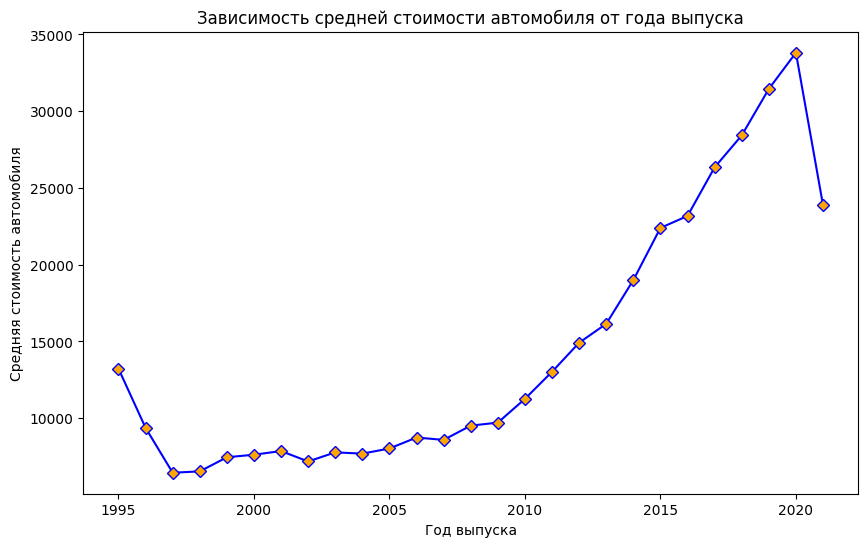

In [27]:
plt.figure(figsize=(10,6))
plt.plot(
    yearly_price_filtered['Year'], 
    yearly_price_filtered['Average_Price'], 
    color='blue',            
    marker='D',            
    markerfacecolor='orange' 
)
plt.title('Зависимость средней стоимости автомобиля от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя стоимость автомобиля')

7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: да есть связь, так как коэффициент корреляции выше 0, значит, между годом выпуска и стоимостью автомобиля существует линейная зависимость.

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: Слабая корреляция начинается с 0,5, нет сильной корреляции можно сказать она умеренная

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: да прямой, так как коэффициент положительный чем новее авто тем дороже цена 

In [28]:
corr = df_filtered['price'].corr(df_filtered['year'])
print(f'Коэффициент корреляции Пирсона: {corr:.3f}')

Коэффициент корреляции Пирсона: 0.550


8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

Text(0, 0.5, 'Количество автомобилей')

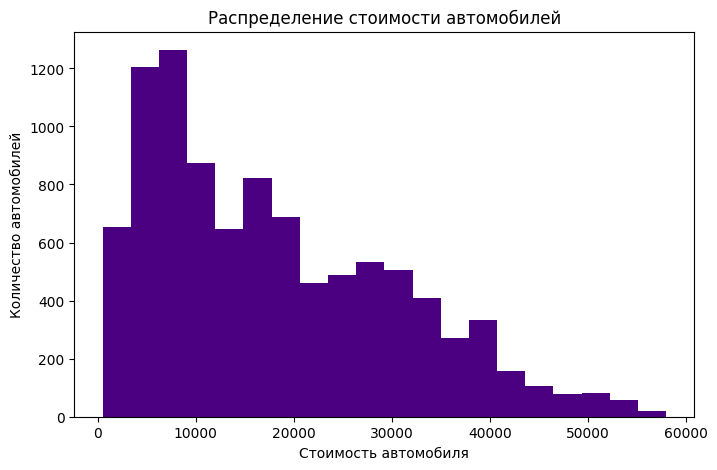

In [30]:
plt.figure(figsize=(8,5))
plt.hist(df_filtered['price'], bins=20, color='indigo')
plt.title('Распределение стоимости автомобилей')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Количество автомобилей')

9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [ ]:
df_new.to_csv('data/vehicles_dataset_upd2.csv', index=False)

### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории. 

Подумайте, почему полученный график так выглядит?


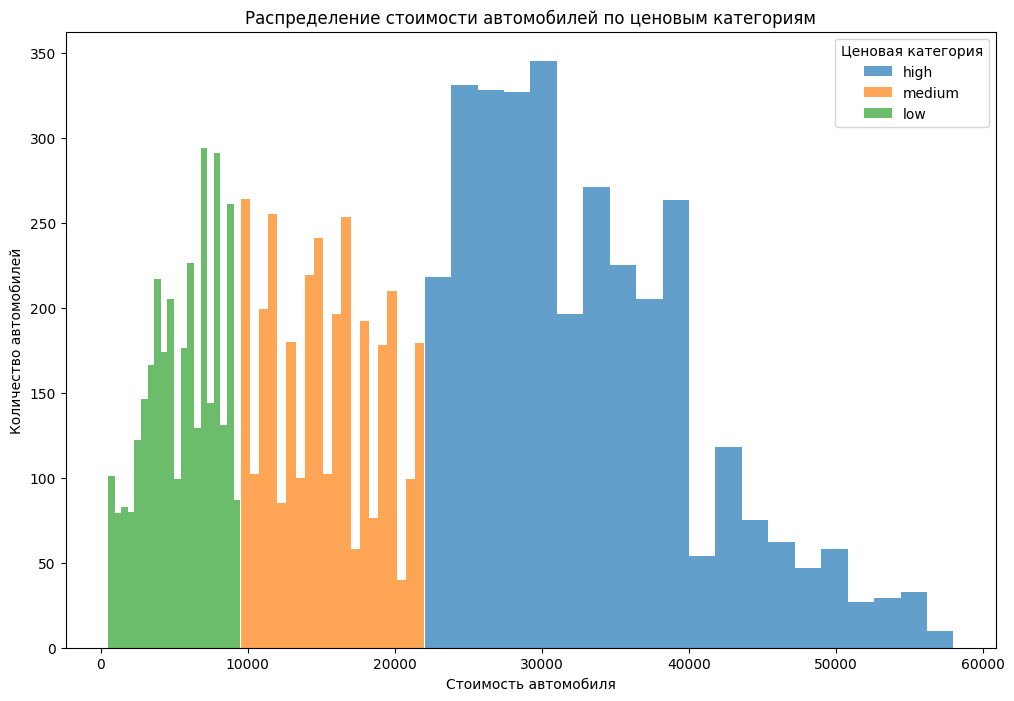

In [32]:
plt.figure(figsize=(12,8))
colors = {'Low':'green', 'Medium':'orange', 'High':'red'}
for category in df_new['price_category'].unique():
    plt.hist(
        df_new[df_new['price_category'] == category]['price'],
        bins=20,
        alpha=0.7,
        label=category
    )

plt.title('Распределение стоимости автомобилей по ценовым категориям')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Количество автомобилей')
plt.legend(title='Ценовая категория')

низкие цены выделены в зеленый цвет, оранжевый (средняя цена), синий (высокая цена), распределены поровну по всему графику от мин до макс цены

2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу. 

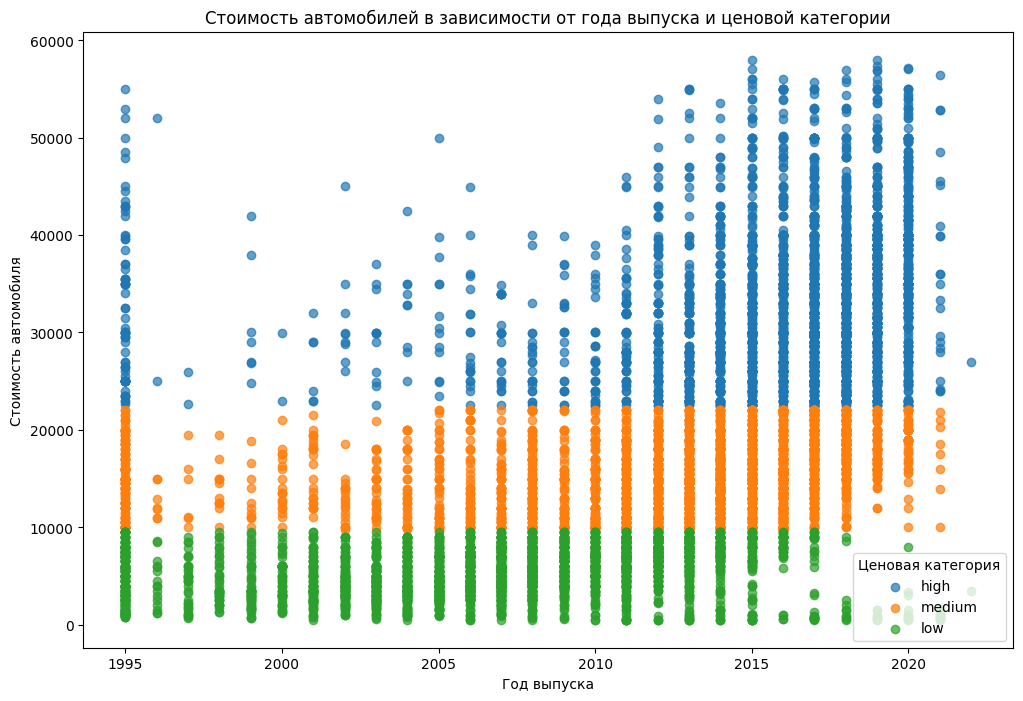

In [33]:
plt.figure(figsize=(12,8))
colors = {'Low':'green', 'Medium':'orange', 'High':'red'}
for category in df_new['price_category'].unique():
    subset = df_new[df_new['price_category'] == category]
    plt.scatter(
        subset['year'],
        subset['price'],
        label=category,
        alpha=0.7
    )

plt.title('Стоимость автомобилей в зависимости от года выпуска и ценовой категории')
plt.xlabel('Год выпуска')
plt.ylabel('Стоимость автомобиля')
plt.legend(title='Ценовая категория', loc='lower right')

### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [36]:
manufacturer_stats = df_new.groupby('manufacturer').size().reset_index(name='Car_Count')
manufacturer_stats.rename(columns={'manufacturer': 'Manufacturer'}, inplace=True)
print(manufacturer_stats)

       Manufacturer  Car_Count
0             acura        149
1        alfa-romeo         13
2              audi        193
3               bmw        307
4             buick        145
5          cadillac        179
6         chevrolet       1243
7          chrysler        159
8            datsun          2
9             dodge        321
10          ferrari          1
11             fiat         23
12             ford       1564
13              gmc        343
14  harley-davidson          4
15            honda        460
16          hyundai        221
17         infiniti        117
18           jaguar         43
19             jeep        483
20              kia        198
21            lexus        175
22          lincoln        109
23            mazda        142
24    mercedes-benz        221
25          mercury         32
26             mini         69
27       mitsubishi         82
28           nissan        452
29            other        326
30          pontiac         60
31      

2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'acura'),
  Text(1, 0, 'alfa-romeo'),
  Text(2, 0, 'audi'),
  Text(3, 0, 'bmw'),
  Text(4, 0, 'buick'),
  Text(5, 0, 'cadillac'),
  Text(6, 0, 'chevrolet'),
  Text(7, 0, 'chrysler'),
  Text(8, 0, 'datsun'),
  Text(9, 0, 'dodge'),
  Text(10, 0, 'ferrari'),
  Text(11, 0, 'fiat'),
  Text(12, 0, 'ford'),
  Text(13, 0, 'gmc'),
  Text(14, 0, 'harley-davidson'),
  Text(15, 0, 'honda'),
  Text(16, 0, 'hyundai'),
  Text(17, 0, 'infiniti'),
  Text(18, 0, 'jaguar'),
  Text(19, 0, 'jeep'),
  Text(20, 0, 'kia'),
  Text(21, 0, 'lexus'),
  Text(22, 0, 'lincoln'),
  Text(23, 0, 'mazda'),
  Text(24, 0, 'mercedes-benz'),
  Text(25, 0, 'mercury'),
  Text(26, 0, 'mini'),
  Text(27, 0, 'mitsubishi'),
  Text(28, 0, 'nissan'),
  Text(29, 0, 'other'),
  Text(30, 0, 'pon

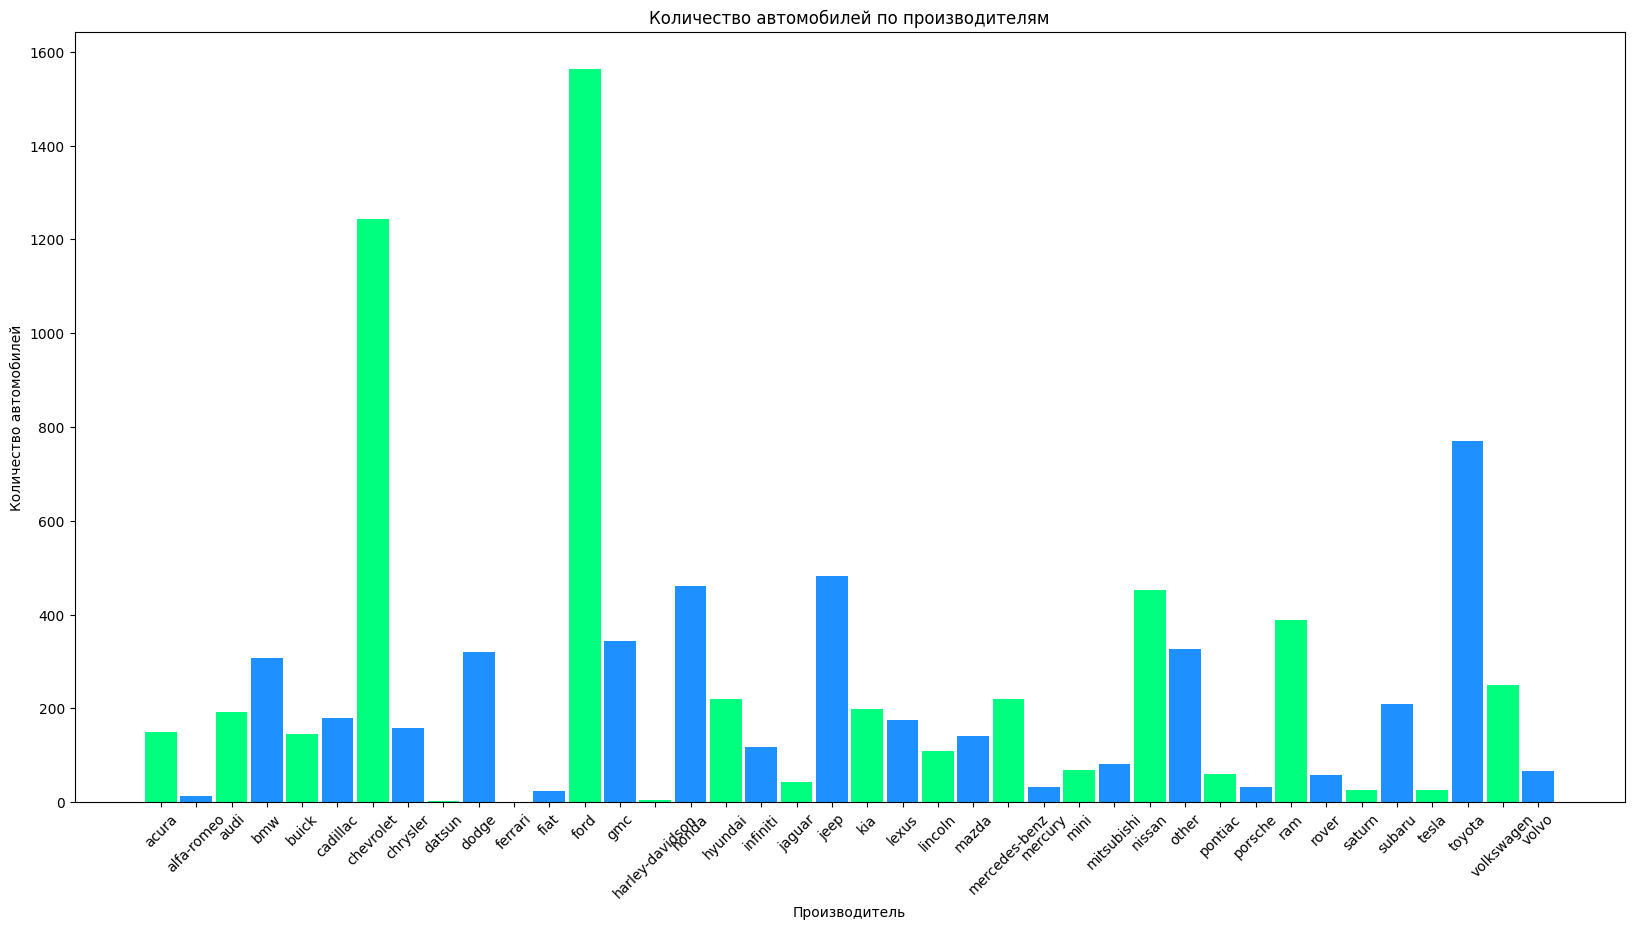

In [37]:
plt.figure(figsize=(20,10))
colors = ['springgreen' if i % 2 == 0 else 'dodgerblue' for i in range(len(manufacturer_stats))]
plt.bar(manufacturer_stats['Manufacturer'], manufacturer_stats['Car_Count'], 
        color=colors, width=0.9)
plt.title('Количество автомобилей по производителям')
plt.xlabel('Производитель')
plt.ylabel('Количество автомобилей')
plt.xticks(rotation=45) 

3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [38]:
transmission_stats = df_new.groupby('transmission').size().reset_index(name='Car_Count')
transmission_stats.rename(columns={'transmission': 'Transmission'}, inplace=True)
print(transmission_stats)

  Transmission  Car_Count
0    automatic       7400
1       manual        612
2        other       1649


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


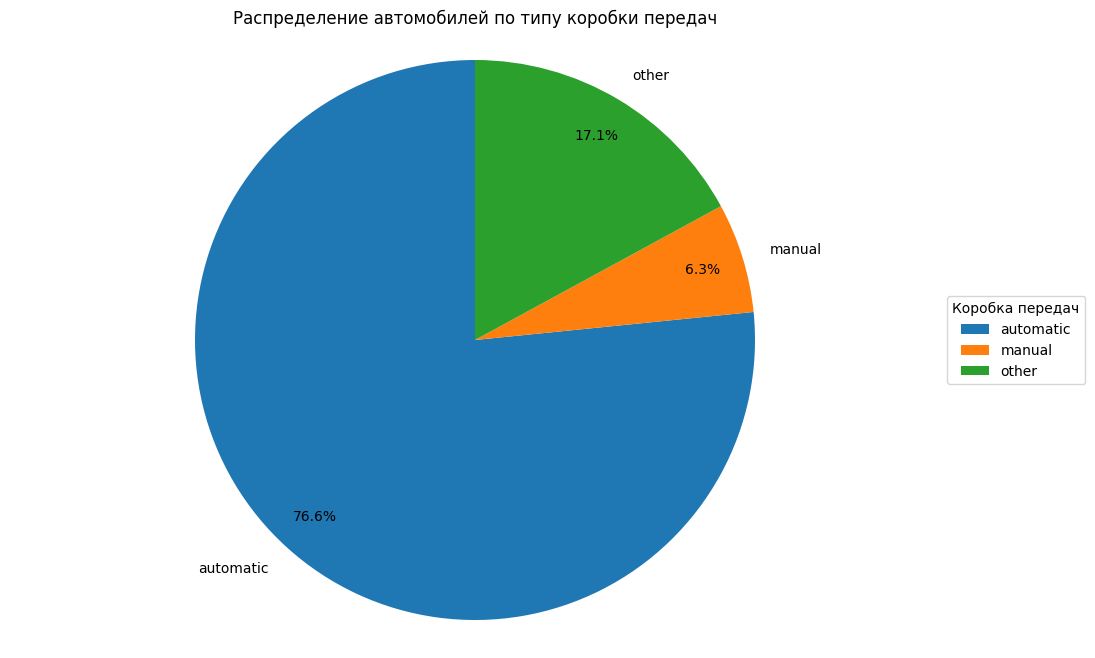

In [39]:
plt.figure(figsize=(12,8))
plt.pie(
    transmission_stats['Car_Count'],         
    labels=transmission_stats['Transmission'],
    autopct='%1.1f%%',                       
    pctdistance=0.85,                           
    startangle=90                               
)

plt.title('Распределение автомобилей по типу коробки передач')
plt.axis('equal')  
plt.legend(transmission_stats['Transmission'], title='Коробка передач', loc='center left', bbox_to_anchor=(1, 0.5))